Exponential Smoothing Forecasts for α=0.1 and α=0.6
|   Week |   Demand |   Forecast (α=0.1) |   Forecast (α=0.6) |
|-------:|---------:|-------------------:|-------------------:|
|      1 |      820 |             820    |             820    |
|      2 |      775 |             820    |             820    |
|      3 |      680 |             815.5  |             793    |
|      4 |      655 |             801.95 |             725.2  |
|      5 |      750 |             787.26 |             683.08 |
|      6 |      802 |             783.53 |             723.23 |
|      7 |      798 |             785.38 |             770.49 |
|      8 |      689 |             786.64 |             787    |
|      9 |      775 |             776.88 |             728.2  |
|     10 |      nan |             776.69 |             756.28 |


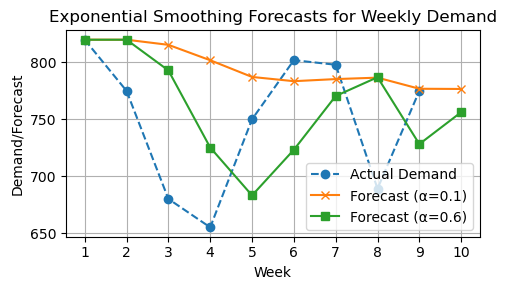

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def exponential_smoothing_forecast(data, alpha):
    forecasts = [data.loc[0, 'Demand']]
    for i in range(1, len(data)):
        forecast_value = alpha * data.loc[i-1, 'Demand'] + (1 - alpha) * forecasts[i-1]
        forecasts.append(forecast_value)
    return forecasts

demand_data = {
    'Week': list(range(1, 11)),
    'Demand': [820, 775, 680, 655, 750, 802, 798, 689, 775, None]
}
df = pd.DataFrame(demand_data)
alpha_1 = 0.10
alpha_2 = 0.60

df[f'Forecast (α={alpha_1})'] = exponential_smoothing_forecast(df, alpha_1)
df[f'Forecast (α={alpha_2})'] = exponential_smoothing_forecast(df, alpha_2)

print(f"Exponential Smoothing Forecasts for α={alpha_1} and α={alpha_2}")
print(df.round(2).to_markdown(index=False))


plt.figure(figsize=(5, 3))

plt.plot(df['Week'], df['Demand'], label='Actual Demand', marker='o', linestyle='--')

plt.plot(df['Week'], df[f'Forecast (α={alpha_1})'], label=f'Forecast (α={alpha_1})', marker='x', linestyle='-')

plt.plot(df['Week'], df[f'Forecast (α={alpha_2})'], label=f'Forecast (α={alpha_2})', marker='s', linestyle='-')
plt.title('Exponential Smoothing Forecasts for Weekly Demand')
plt.xlabel('Week')
plt.ylabel('Demand/Forecast')
plt.xticks(df['Week'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
